<a href="https://colab.research.google.com/github/unknown-jun/Deep_learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론
퍼셉트론이란?
- 인간의 뇌세포 하나를 컴퓨터로 흉내낸 것
- 1957년 프랑크 로젠블라트가 퍼셉트론을 고안함
- 사람의 뇌의 동작을 전기 수위치 온/오프로 흉내낼 수 있다는 이론을 증명

퍼셉트론의 중요 3가지  
1. 자극(stimulus)
2. 반응(response)
3. 역치(threshold)  

&emsp;" 특정 자극이 있다면 그 자극이 어느 역치 이상이어야 세포가 반응한다"  
&emsp;예: 짜게 먹는 사람은 자기가 평소에 먹는 만큼 음식이 짜지 않으면 싱겁다고 느낀다(역치 이하의 자극은 무시)


단순한 논리 회로
1. AND 게이트

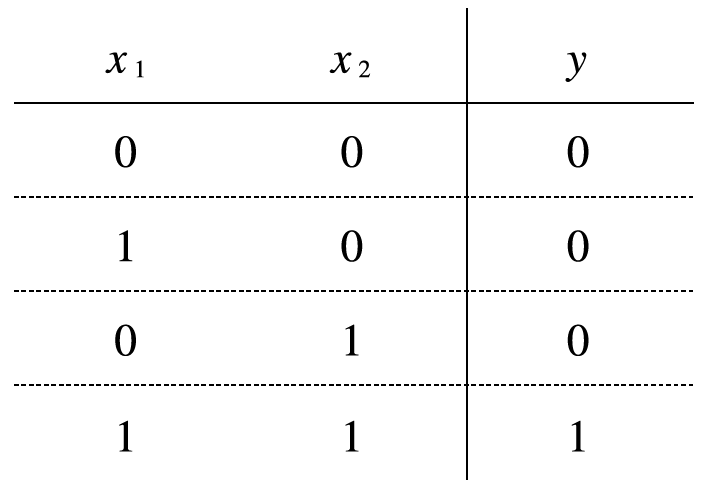

2. OR 게이트

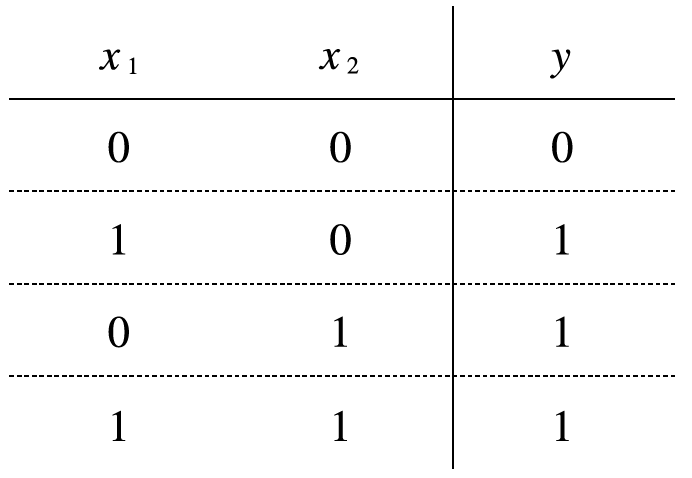

3. NAND 게이트

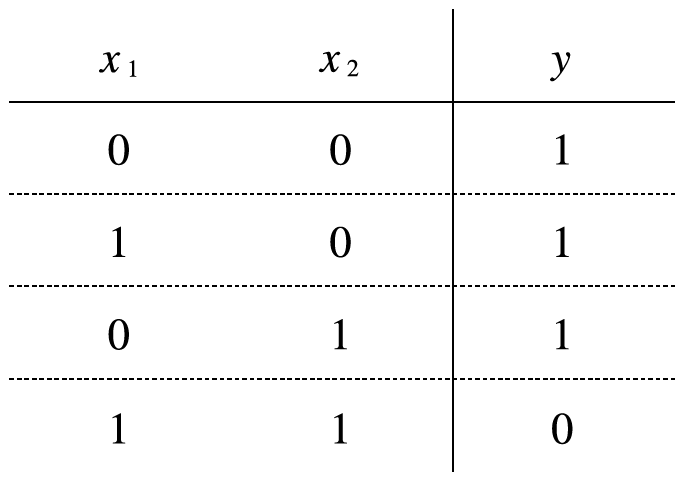

4. XOR 게이트

<br>

eXclusive OR 게이트   
배타적 (자기 외에는 거부한다)

- 1957 로젠블래트 퍼셉트론
- 1959 민스키가 퍼셉트론의 문제점을 지적했는데 xor 게이트는 분류를 못한다는 문제점을 지적을 했다.
- AND, OR, NAND는 단층 신경망으로 구현이 되는데 XOR 게이트는 단충으로는 구현이 되지 않음
- 20년 후에 다층 퍼셉트론으로 비선형 영역을 분류했음

문제 17. 위의 AND 게이트를 위한 데이터 행렬을 numpy array로 구현하시오

In [ ]:
import numpy as np

X = np.array([ [0,0],[0,1],[1,0],[1,1] ]) # 입력 데이터
y = np.array([ [0], [0], [0], [1] ]) # 정답

print(X.shape)
print(y.shape)

(4, 2)
(4, 1)


문제 18. AND 게이트 퍼셉트론 함수를 생성하시오

In [ ]:
def AND( x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 
    tmp = x1 * w1 + x2 * w2    # 입력값과 가중치 곱의 총합
    if tmp <= theta:  # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


문제 19. OR 게이트 퍼셉트론 함수를 생성하시오

In [ ]:
def OR( x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.3
    tmp = x1 * w1 + x2 * w2    # 입력값과 가중치 곱의 총합
    if tmp <= theta:  # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


문제 20. AND 게이트의 데이터 행렬에서 X행렬에 1행 1열에 데이터를 가져오시오  
X = np.array([ [0,0],[0,1],[1,0],[1,1] ]) 

In [ ]:
X = np.array([ [0,0],[0,1],[1,0],[1,1] ]) 

X[0][0]

0

문제 21. 위에서 만든 퍼셉트론 함수 AND를 가지고 입력값 X에 데이터를 입력받아 아래와 같이 결과를 출력하시오

X = np.array([ [0,0],[0,1],[1,0],[1,1] ])  # 입력데이터  


결과:   
0  
0  
0  
1

In [ ]:
def AND( x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 
    tmp = x1 * w1 + x2 * w2    # 입력값과 가중치 곱의 총합
    if tmp <= theta:  # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 0
    elif tmp > theta:
        return 1

X = np.array([ [0,0],[0,1],[1,0],[1,1] ]) 

for i in range(len(X)):
    print( AND(X[i][0], X[i][1]) )

0
0
0
1


문제 22. 아래의 표와 같은 NAND 게이트 함수를 생성하고 구현하시오.

In [ ]:
def NAND( x1, x2 ):
    w1, w2, theta = 0.5, 0.5, 0.7 
    tmp = x1 * w1 + x2 * w2    # 입력값과 가중치 곱의 총합
    if tmp <= theta:  # 입력값과 가중치의 총합이 임계치를 넘지 않는다면
        return 1
    elif tmp > theta:
        return 0

문제 23. 그림 2-11에 나오는 그림으로 입력값 데이터를 받아서 XOR 게이트 결과가 나오게 출력하시오

print(XOR(0,0))  
print(XOR(1,0))  
print(XOR(0,1))  
print(XOR(1,1))

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


# 가중치와 편향 구현하기

1. 파라미터: 가중치 편향
2. 하이퍼 파라미터: 러닝 레이트, 가중치 감소(decay), 층수와 뉴런의 갯수

- 가중치: 입력신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수
- 편향: 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수

예: AND 게이트 처럼 입력신호가 x1과 x2 값을 받는 경우에 편향(x0)이 없다면 target을 분류하는 직선은 무조건 원점을 통과해야만 하기 때문에 제대로 분류할 수 없게 됨

<br>

문제 24. 편향을 넣어서 AND 게이트 함수를 생성하시오



In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # 실제로는 이 w 와 b를 기계가 학습해서 알아내야 함
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp >= 0:
        return 0
    else:
        return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

1
1
1
0


문제 25. OR 게이트 함수를 생성하시오

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # 실제로는 이 w 와 b를 기계가 학습해서 알아내야 함
    b = -0.4
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


문제. NAND 게이트 함수를 만들고 XOR 게이트 함수를 만들어서 아래의 결과가 출력되게 하시오

print(XOR(0,0)) 0  
print(XOR(1,0)) 1  
print(XOR(0,1)) 1  
print(XOR(1,1)) 0

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.4, 0.4])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp > 0:
        return 1
    else:
        return 0

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.4
    tmp = np.sum(x*w) + b
    if tmp > 0:
        return 1
    else:
        return 0

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.2, -0.2])
    b = 0.4
    tmp = np.sum(x*w) + b
    if tmp > 0:
        return 1
    else:
        return 0

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
    
print(XOR(0,0)) 
print(XOR(1,0)) 
print(XOR(0,1)) 
print(XOR(1,1)) 

0
1
1
0
